# Setup

In [1]:
import sys
import anndata
from scipy.sparse import csr_matrix

# the path to the scVI github repo https://github.com/YosefLab/scVI
# sys.path.append('/data/yosef2/users/chenling/scVI/')
sys.path.append('/home/angela/src/scVI_TSP/')
# the path to tabulasapiens github repo https://github.com/czbiohub/tabula-sapiens
# sys.path.append('/data/yosef2/users/chenling/tabula-sapiens/')
sys.path.append('/home/angela/sapiens/tabula-sapiens/')

from scvi.dataset import AnnDatasetFromAnnData
from utils.annotations_utils import *
from anndata import read_h5ad
import scanpy as sc

# if a model has been trained load pretrained model rather than retraining
retrain=False


/home/angela/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
import matplotlib
%matplotlib inline

In [3]:
# data_path = '/data/yosef2/users/chenling/TabulaSapiensData/'
# model_path = '/data/yosef2/users/chenling/TabulaSapiens/scVImodels/combined/'
# res_path = '/data/yosef2/users/chenling/TabulaSapiens/Combined'

# if not os.path.exists(model_path):
#     os.mkdir(model_path)
# if not os.path.exists(model_path+'scanvi/'):
#     os.mkdir(model_path+'scanvi/')
# if not os.path.exists(res_path):
#     os.mkdir(res_path)
    
    
data_path = '/mnt/ibm_lg/angela/sapiens/data/'
model_path = '/mnt/ibm_lg/angela/sapiens/data/scVI_models/'
res_path = '/mnt/ibm_lg/angela/sapiens/data/'

In [5]:
combined = read_h5ad(data_path + 'Pilot1_Pilot2_filtered_ensembl_id_Jun29.h5ad')
# combined = read_h5ad(data_path + 'combined/Pilot1_Pilot2_filtered_ensembl_id.h5ad')

In [6]:
ss2_index = combined.obs.loc[combined.obs['method']=='smartseq2'].index
len(ss2_index)

12497

In [8]:
# txlen = pd.read_csv(data_path + 'homo.gencode.v30.annotation.ERCC92.iso_length.txt', delimiter='\t')

# combined.var['len'] = 0
# txlen = pd.read_csv(data_path + 'homo.gencode.v30.annotation.ERCC92.iso_length.txt', delimiter='\t')
# for x in np.unique(txlen['gene']):
#     isolen = txlen.loc[txlen['gene']==x,'length'].values.astype(int)
#     if x in combined.var.index:
#         combined.var.loc[x,'len'] = np.mean(isolen)


In [8]:
# combined.var.to_csv(data_path + 'combined/combined.var.csv')

In [10]:
var = pd.read_csv('ss2.var.csv',index_col=0)
assert np.sum(var.index == combined.var.index) == var.shape[0]
med_len = np.median(var['len'])

In [11]:
rand = np.arange(0, np.sum(combined.obs['method']=='smartseq2'),500)

In [12]:
temp = combined[combined.obs['method']=='smartseq2'].X[rand]

In [13]:
for i,x in enumerate(ss2_index):
    a = np.asarray(combined[x].X.todense()).ravel()
    b = (a[a>0]/var.loc[a>0,'len'].values*med_len).astype(int)
    combined[x,var.loc[a>0].index].X = b

In [14]:
temp2 = combined[combined.obs['method']=='smartseq2'].X[rand]

In [15]:
for i in range(len(rand)):
    a = np.asarray(temp[i].todense()).ravel()
    b = np.asarray(temp2[i].todense()).ravel()
    assert (np.sum((a/var['len'].values*med_len).astype(int)==b)) == len(a)

In [16]:
var.head()

,feature_types-0,gene_symbol-0,ensembls-1,query-1,_id-1,_score-1-0,entrezgene-1,name-1-0,taxid-1,notfound-1,n_cells-1-0,gene_symbol-1-0,_score-1-1,name-1-1,n_cells-1-1,gene_symbol-1-1,len
ENSG00000223972.5,Gene Expression,DDX11L1,ENSG00000223972,ENSG00000223972,ENSG00000223972,28.898235,NaN,DEAD/H-box helicase 11 like 1,9606.0,NaN,5,DDX11L1,28.912962,DEAD/H-box helicase 11 like 1,0,DDX11L1,1144.5
ENSG00000227232.5,Gene Expression,WASH7P,ENSG00000227232,ENSG00000227232,ENSG00000227232,10.178344,NaN,"WASP family homolog 7, pseudogene",9606.0,NaN,65,WASH7P,10.174388,"WASP family homolog 7, pseudogene",0,WASH7P,1351.0
ENSG00000278267.1,Gene Expression,MIR6859-1,ENSG00000278267,ENSG00000278267,ENSG00000278267,32.521180,NaN,microRNA 6859-1,9606.0,NaN,3,MIR6859-1,32.540504,microRNA 6859-1,64,MIR6859-1,68.0
ENSG00000243485.5,Gene Expression,MIR1302-2HG,ENSG00000243485,ENSG00000243485,ENSG00000243485,30.583565,NaN,MIR1302-2 host gene,9606.0,NaN,8,MIR1302-2HG,30.603180,MIR1302-2 host gene,4,MIR1302-2HG,623.5
ENSG00000284332.1,Gene Expression,MIR1302-2,ENSG00000284332,ENSG00000284332,ENSG00000284332,32.521130,NaN,microRNA 1302-2,9606.0,NaN,1,MIR1302-2,32.539940,microRNA 1302-2,2,MIR1302-2,138.0


In [17]:
combined.var

,feature_types-0-0,n_cells-0-0,gene_symbol-0-0,n_cells-1-0,n_cells-0,feature_types-0-0-1,gene_symbol-0-0-1,n_cells-1-0-1,n_cells-1-1,n_cells
ENSG00000223972.5,Gene Expression,0,DDX11L1,2,2,Gene Expression,DDX11L1,21,25,50
ENSG00000227232.5,Gene Expression,1,WASH7P,529,529,Gene Expression,WASH7P,598,795,1946
ENSG00000278267.1,Gene Expression,0,MIR6859-1,7,7,Gene Expression,MIR6859-1,6,8,21
ENSG00000243485.5,Gene Expression,0,MIR1302-2HG,4,4,Gene Expression,MIR1302-2HG,7,7,19
ENSG00000284332.1,Gene Expression,0,MIR1302-2,0,0,Gene Expression,MIR1302-2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,Gene Expression,19450,MT-ND6,3662,23087,Gene Expression,MT-ND6,3344,3815,114054
ENSG00000210194.1,Gene Expression,169,MT-TE,1289,1446,Gene Expression,MT-TE,502,512,3070
ENSG00000198727.2,Gene Expression,43309,MT-CYB,4070,47347,Gene Expression,MT-CYB,3621,4116,202843
ENSG00000210195.2,Gene Expression,2170,MT-TT,2,2172,Gene Expression,MT-TT,5,2,12019


In [ ]:
combined.write_h5ad(data_path + 'Pilot1_Pilot2_filtered_ensembl_id.june29.ss2_norm.2.h5ad')

In [67]:
combined = read_h5ad(data_path + 'Pilot1_Pilot2_filtered_ensembl_id.june29.ss2_norm.2.h5ad')
combined

AnnData object with n_obs × n_vars = 204082 × 58870 
    obs: '10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'notes', 'donor', 'smartseq2_sorted_population', '10X_replicate', '10X_sample', 'sequencer', 'sex', 'anatomical_position', 'tissue', 'smartseq2_well_seq', '10X_barcode', 'n_counts', 'n_genes', 'batch', 'donor_tech_tissue'
    var: 'feature_types-0-0', 'n_cells-0-0', 'gene_symbol-0-0', 'n_cells-1-0', 'n_cells-0', 'feature_types-0-0-1', 'gene_symbol-0-0-1', 'n_cells-1-0-1', 'n_cells-1-1', 'n_cells'
    uns: 'donor_colors', 'method_colors', 'neighbors', 'umap'
    obsm: 'UMAP_donor_tech.100', 'UMAP_donor_tech.200', 'UMAP_donor_tech.50', 'X_scvi', 'X_scvi_donor_tech', 'X_umap'

# batch by donor and technology


Remove Fat & Heart

In [70]:
combined = combined[~combined.obs['tissue'].isin(['Fat','Heart'])]
combined

View of AnnData object with n_obs × n_vars = 203513 × 58870 
    obs: '10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'notes', 'donor', 'smartseq2_sorted_population', '10X_replicate', '10X_sample', 'sequencer', 'sex', 'anatomical_position', 'tissue', 'smartseq2_well_seq', '10X_barcode', 'n_counts', 'n_genes', 'batch', 'donor_tech_tissue'
    var: 'feature_types-0-0', 'n_cells-0-0', 'gene_symbol-0-0', 'n_cells-1-0', 'n_cells-0', 'feature_types-0-0-1', 'gene_symbol-0-0-1', 'n_cells-1-0-1', 'n_cells-1-1', 'n_cells'
    uns: 'donor_colors', 'method_colors', 'neighbors', 'umap'
    obsm: 'UMAP_donor_tech.100', 'UMAP_donor_tech.200', 'UMAP_donor_tech.50', 'X_scvi', 'X_scvi_donor_tech', 'X_umap'

## Low qual cells?

In [101]:
low_qual_cells = pd.read_csv("Pilot1_Pilot2.annotation.csv", index_col=0)
low_qual_cells

,10X_run,smartseq2_barcode,smartseq2_library_plate,smartseq2_sorting_direction,smartseq2_sort_order,smartseq2_cDNA_Plate,cell_id,method,notes,donor,...,sex,anatomical_position,tissue,smartseq2_well_seq,10X_barcode,donor_tech,batch,barcode,manual_annotation,manual_cell_ontology_class
AAACCCAAGTTGTCGT-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,TSP1_blood_2,NaN,NaN,NaN,NaN,NaN,AAACCCAAGTTGTCGT_TSP1_blood_2,10X,NaN,TSP1,...,female,NaN,Blood,NaN,AAACCCAAGTTGTCGT,TSP1_10X,0,TSP1_AAACCCAAGTTGTCGT,unassigned,unassigned
AAACGAAAGCCGTTAT-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,TSP1_blood_2,NaN,NaN,NaN,NaN,NaN,AAACGAAAGCCGTTAT_TSP1_blood_2,10X,NaN,TSP1,...,female,NaN,Blood,NaN,AAACGAAAGCCGTTAT,TSP1_10X,0,TSP1_AAACGAAAGCCGTTAT,unassigned,unassigned
AAAGGATAGTGTTGTC-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,TSP1_blood_2,NaN,NaN,NaN,NaN,NaN,AAAGGATAGTGTTGTC_TSP1_blood_2,10X,NaN,TSP1,...,female,NaN,Blood,NaN,AAAGGATAGTGTTGTC,TSP1_10X,0,TSP1_AAAGGATAGTGTTGTC,unassigned,unassigned
AAAGGGCAGGAACTAT-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,TSP1_blood_2,NaN,NaN,NaN,NaN,NaN,AAAGGGCAGGAACTAT_TSP1_blood_2,10X,NaN,TSP1,...,female,NaN,Blood,NaN,AAAGGGCAGGAACTAT,TSP1_10X,0,TSP1_AAAGGGCAGGAACTAT,unassigned,unassigned
AAAGGGCCAACCAACT-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,TSP1_blood_2,NaN,NaN,NaN,NaN,NaN,AAAGGGCCAACCAACT_TSP1_blood_2,10X,NaN,TSP1,...,female,NaN,Blood,NaN,AAAGGGCCAACCAACT,TSP1_10X,0,TSP1_AAAGGGCCAACCAACT,unassigned,unassigned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Spleen_NA_SS2_B114583_B104854_Granulocyte_H2_S170.homo.gencode.v30.ERCC.chrM-1-1,NaN,NaN,B104854,NaN,NaN,B114583,TSP2_Spleen_NA_SS2_B114583_B104854_Granulocyte...,smartseq2,NaN,TSP2,...,female,NaN,Spleen,H2,NaN,TSP2_smartseq2,3,TSP2_TSP2_Spleen_NA_SS2_B114583_B104854_Granul...,unassigned,unassigned
TSP2_Spleen_NA_SS2_B114583_B104854_Granulocyte_H4_S172.homo.gencode.v30.ERCC.chrM-1-1,NaN,NaN,B104854,NaN,NaN,B114583,TSP2_Spleen_NA_SS2_B114583_B104854_Granulocyte...,smartseq2,NaN,TSP2,...,female,NaN,Spleen,H4,NaN,TSP2_smartseq2,3,TSP2_TSP2_Spleen_NA_SS2_B114583_B104854_Granul...,unassigned,unassigned
TSP2_Spleen_NA_SS2_B114583_B104854_Granulocyte_H6_S174.homo.gencode.v30.ERCC.chrM-1-1,NaN,NaN,B104854,NaN,NaN,B114583,TSP2_Spleen_NA_SS2_B114583_B104854_Granulocyte...,smartseq2,NaN,TSP2,...,female,NaN,Spleen,H6,NaN,TSP2_smartseq2,3,TSP2_TSP2_Spleen_NA_SS2_B114583_B104854_Granul...,unassigned,unassigned
TSP2_Spleen_NA_SS2_B114583_B104854_Granulocyte_H7_S175.homo.gencode.v30.ERCC.chrM-1-1,NaN,NaN,B104854,NaN,NaN,B114583,TSP2_Spleen_NA_SS2_B114583_B104854_Granulocyte...,smartseq2,NaN,TSP2,...,female,NaN,Spleen,H7,NaN,TSP2_smartseq2,3,TSP2_TSP2_Spleen_NA_SS2_B114583_B104854_Granul...,unassigned,unassigned


In [102]:
set(low_qual_cells['manual_cell_ontology_class'])

{'B cell',
 'CD34-positive, CD38-negative multipotent progenitor cell',
 'CD4-positive helper T cell',
 'CD4-positive, CD25-positive, alpha-beta regulatory T cell',
 'CD4-positive, alpha-beta T cell',
 'CD4-positive, alpha-beta cytotoxic T cell',
 'CD4-positive, alpha-beta memory T cell',
 'CD8-alpha-alpha-positive, alpha-beta intraepithelial T cell',
 'CD8-positive, alpha-beta T cell',
 'CD8-positive, alpha-beta memory T cell',
 'DN1 thymic pro-T cell',
 'T cell',
 'T follicular helper cell',
 'T-helper 17 cell',
 'activated CD8-positive, alpha-beta T cell, human',
 'adventitial cell',
 'basal cell',
 'basophil',
 'bladder urothelial cell',
 'bronchial smooth muscle cell',
 'capillary endothelial cell',
 'ciliated cell',
 'classical monocyte',
 'club cell',
 'conventional dendritic cell',
 'dendritic cell, human',
 'double negative thymocyte',
 'early lymphoid progenitor',
 'effector memory CD4-positive, alpha-beta T cell',
 'effector memory CD8-positive, alpha-beta T cell',
 'endothe

In [76]:
set(combined.obs[~combined.obs['cell_id'].isin(low_qual_cells['cell_id'])]['tissue'])

{'Blood',
 'Bone_Marrow',
 'Kidney',
 'Large_Intestine',
 'Lung',
 'Lymph_Node',
 'Muscle',
 'Small_Intestine',
 'Spleen',
 'Thymus',
 'Trachea',
 'Vasculature'}

In [65]:
combined.obs#.loc[low_qual_cells.index]

,10X_run,smartseq2_barcode,smartseq2_library_plate,smartseq2_sorting_direction,smartseq2_sort_order,smartseq2_cDNA_Plate,cell_id,method,notes,donor,...,sequencer,sex,anatomical_position,tissue,smartseq2_well_seq,10X_barcode,n_counts,n_genes,batch,donor_tech_tissue
AAACCCAAGTTGTCGT-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,TSP1_blood_2,nan,nan,nan,nan,nan,AAACCCAAGTTGTCGT_TSP1_blood_2,10X,nan,TSP1,...,novaseq,female,nan,Blood,nan,AAACCCAAGTTGTCGT,8338.0,2056,1,TSP1_10X_Blood
AAACGAAAGCCGTTAT-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,TSP1_blood_2,nan,nan,nan,nan,nan,AAACGAAAGCCGTTAT_TSP1_blood_2,10X,nan,TSP1,...,novaseq,female,nan,Blood,nan,AAACGAAAGCCGTTAT,5717.0,1847,1,TSP1_10X_Blood
AAAGGATAGTGTTGTC-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,TSP1_blood_2,nan,nan,nan,nan,nan,AAAGGATAGTGTTGTC_TSP1_blood_2,10X,nan,TSP1,...,novaseq,female,nan,Blood,nan,AAAGGATAGTGTTGTC,8060.0,2208,1,TSP1_10X_Blood
AAAGGGCAGGAACTAT-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,TSP1_blood_2,nan,nan,nan,nan,nan,AAAGGGCAGGAACTAT_TSP1_blood_2,10X,nan,TSP1,...,novaseq,female,nan,Blood,nan,AAAGGGCAGGAACTAT,9246.0,2782,1,TSP1_10X_Blood
AAAGGGCCAACCAACT-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,TSP1_blood_2,nan,nan,nan,nan,nan,AAAGGGCCAACCAACT_TSP1_blood_2,10X,nan,TSP1,...,novaseq,female,nan,Blood,nan,AAAGGGCCAACCAACT,23344.0,4694,1,TSP1_10X_Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P2_S98.homo.gencode.v30.ERCC.chrM-1-1,nan,nan,B133324,nan,nan,B114585,TSP2_Vasculature_aorta_SS2_B114585_B133324_Str...,smartseq2,nan,TSP2,...,novaseq,female,nan,Vasculature,P2,nan,317555.0,2590,39,TSP2_smartseq2_Vasculature
TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P3_S99.homo.gencode.v30.ERCC.chrM-1-1,nan,nan,B133324,nan,nan,B114585,TSP2_Vasculature_aorta_SS2_B114585_B133324_Str...,smartseq2,nan,TSP2,...,novaseq,female,nan,Vasculature,P3,nan,417363.0,2327,39,TSP2_smartseq2_Vasculature
TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P7_S103.homo.gencode.v30.ERCC.chrM-1-1,nan,nan,B133324,nan,nan,B114585,TSP2_Vasculature_aorta_SS2_B114585_B133324_Str...,smartseq2,nan,TSP2,...,novaseq,female,nan,Vasculature,P7,nan,526088.0,2411,39,TSP2_smartseq2_Vasculature
TSP2_Vasculature_aorta_SS2_B114585_B133324_Stromal_P8_S104.homo.gencode.v30.ERCC.chrM-1-1,nan,nan,B133324,nan,nan,B114585,TSP2_Vasculature_aorta_SS2_B114585_B133324_Str...,smartseq2,nan,TSP2,...,novaseq,female,nan,Vasculature,P8,nan,219664.0,1439,39,TSP2_smartseq2_Vasculature


## continue

In [80]:
donor_tech = combined.obs[['donor','method']].apply(lambda x:"_".join(x), axis=1)
combined.obs['donor_tech'] = donor_tech

Trying to set attribute `.obs` of view, copying.


In [81]:
set(combined.obs['donor_tech'])

{'TSP1_10X', 'TSP1_smartseq2', 'TSP2_10X', 'TSP2_smartseq2'}

[2020-06-30 11:18:51,163] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2020-06-30 11:18:51,169] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2020-06-30 11:18:57,294] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2020-06-30 11:18:59,101] INFO - scvi.dataset.dataset | Downsampled from 203513 to 203513 cells


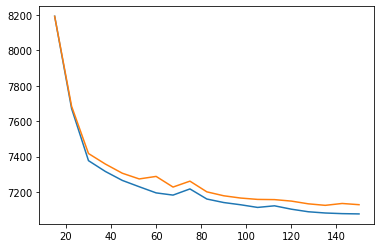

In [82]:
train_data = scVIdata_preprocess(combined, batch_col='donor_tech', label_col='tissue')

posterior = get_scvi_posterior(train_data, 
                               model_path+'Pilot12.all-minus-fat-heart.donor_tech.50.3.ss2_norm.scVI.pkl', 
                               retrain=retrain, n_latent=50, n_layers=3,
                               n_epochs=100, n_epochs_kl_warmup=30)


In [83]:
latent = posterior.get_latent()
combined.obsm['X_scvi'] = latent[0]

In [84]:
sc.pp.neighbors(combined, n_neighbors=100, n_pcs=30, use_rep="X_scvi")
sc.tl.umap(combined)
combined.obsm['UMAP_donor_tech.100'] = combined.obsm['X_umap']
combined.obsm['X_scvi_donor_tech'] = combined.obsm['X_scvi']

KeyboardInterrupt: 

In [ ]:
sc.pp.neighbors(combined, n_neighbors=200, n_pcs=30, use_rep="X_scvi")
sc.tl.umap(combined)
combined.obsm['UMAP_donor_tech.200'] = combined.obsm['X_umap']

In [85]:
sc.pp.neighbors(combined, n_neighbors=50, n_pcs=30, use_rep="X_scvi")
sc.tl.umap(combined)
combined.obsm['UMAP_donor_tech.50'] = combined.obsm['X_umap']

In [ ]:
np.unique(combined.obs['method'],return_counts=True)

... storing 'donor_tech' as categorical


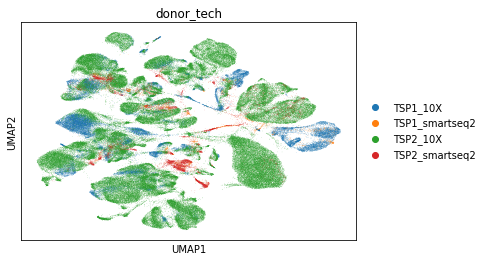

In [86]:
sc.pl.umap(combined, color=['donor_tech'])

In [96]:
def tissue_color_dict():
    
    color_dict = {'Bladder': '#e7969c',
             'Blood': '#d6616b',
             'Bone_Marrow': '#cedb9c',
#              'Fat': '#e7cb94',
#              'Heart': '#637939',
             'Kidney': '#7b4173',
             'Large_Intestine': '#31a354',
             'Lung': '#3182bd',
             'Lymph_Node': '#8c6d31',
             'Muscle': '#e7ba52',
             'Pancreas': '#fd8d3c',
             'Skin': '#ce6dbd',
             'Small_Intestine': '#6baed6',
             'Spleen': '#393b79',
             'Thymus': '#9c9ede',
             'Trachea': '#969696',
             'Vasculature': '#843c39'}
    
    return color_dict

tissue_color_dict = tissue_color_dict()

def donor_color_dict():
    ages = ['TSP1','TSP2']
    
    import matplotlib.colors as pltcolors
    
    cmap = plt.cm.get_cmap("YlGnBu")
        
    age_color_dict = {}
    j=1/len(ages)
    for a in ages:
        age_color_dict[a] = pltcolors.to_hex(cmap(j))
        j+=1/len(ages)
        

    
    return age_color_dict

donor_color_dict = donor_color_dict()
def method_color_dict():
    methods = ['10X','smartseq2']
    
    import matplotlib.colors as pltcolors
    
    method_color_dict = {}
    method_color_dict['10X'] = '#90ee90'
    method_color_dict['smartseq2'] = '#006400'
    
    return method_color_dict
method_color_dict = method_color_dict()

In [89]:
set(combined.obs['tissue'])

{'Bladder',
 'Blood',
 'Bone_Marrow',
 'Kidney',
 'Large_Intestine',
 'Lung',
 'Lymph_Node',
 'Muscle',
 'Pancreas',
 'Skin',
 'Small_Intestine',
 'Spleen',
 'Thymus',
 'Trachea',
 'Vasculature'}

In [97]:
combined.uns['donor_colors'] = list(donor_color_dict.values())
combined.uns['method_colors'] = list(method_color_dict.values())
combined.uns['tissue_colors'] = list(tissue_color_dict.values())

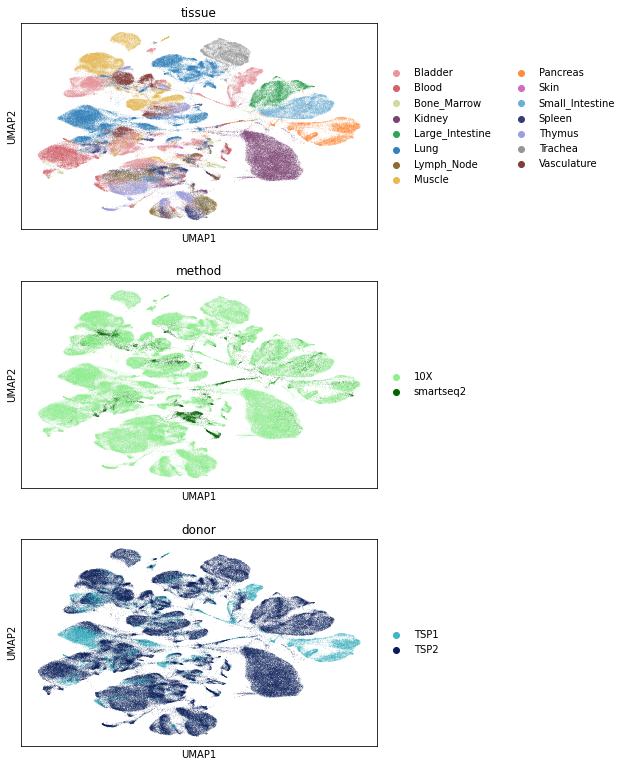

In [99]:
sc.pl.umap(combined, color=['tissue','method','donor'],ncols=1, save = "_scVI_donor_tech.png")

In [ ]:
sc.pl.umap(
    combined[combined.obs['tissue'].isin(['Lung'])],
    color=['donor_tech','tissue','method','donor'],ncols=1)

In [36]:
combined2 = combined.copy()

In [37]:
combined2.var['ensembl.id'] = combined2.var_names
combined2.var = combined2.var.set_index('gene_symbol-0-0')

combined2.var

,feature_types-0-0,n_cells-0-0,n_cells-1-0,n_cells-0,feature_types-0-0-1,gene_symbol-0-0-1,n_cells-1-0-1,n_cells-1-1,n_cells,ensembl.id
gene_symbol-0-0,,,,,,,,,,
DDX11L1,Gene Expression,0,2,2,Gene Expression,DDX11L1,21,25,50,ENSG00000223972.5
WASH7P,Gene Expression,1,529,529,Gene Expression,WASH7P,598,795,1946,ENSG00000227232.5
MIR6859-1,Gene Expression,0,7,7,Gene Expression,MIR6859-1,6,8,21,ENSG00000278267.1
MIR1302-2HG,Gene Expression,0,4,4,Gene Expression,MIR1302-2HG,7,7,19,ENSG00000243485.5
MIR1302-2,Gene Expression,0,0,0,Gene Expression,MIR1302-2,0,0,0,ENSG00000284332.1
...,...,...,...,...,...,...,...,...,...,...
MT-ND6,Gene Expression,19450,3662,23087,Gene Expression,MT-ND6,3344,3815,114054,ENSG00000198695.2
MT-TE,Gene Expression,169,1289,1446,Gene Expression,MT-TE,502,512,3070,ENSG00000210194.1
MT-CYB,Gene Expression,43309,4070,47347,Gene Expression,MT-CYB,3621,4116,202843,ENSG00000198727.2


In [38]:
sum(combined2.var_names.str.startswith('B2M'))

1

Trying to set attribute `.uns` of view, copying.


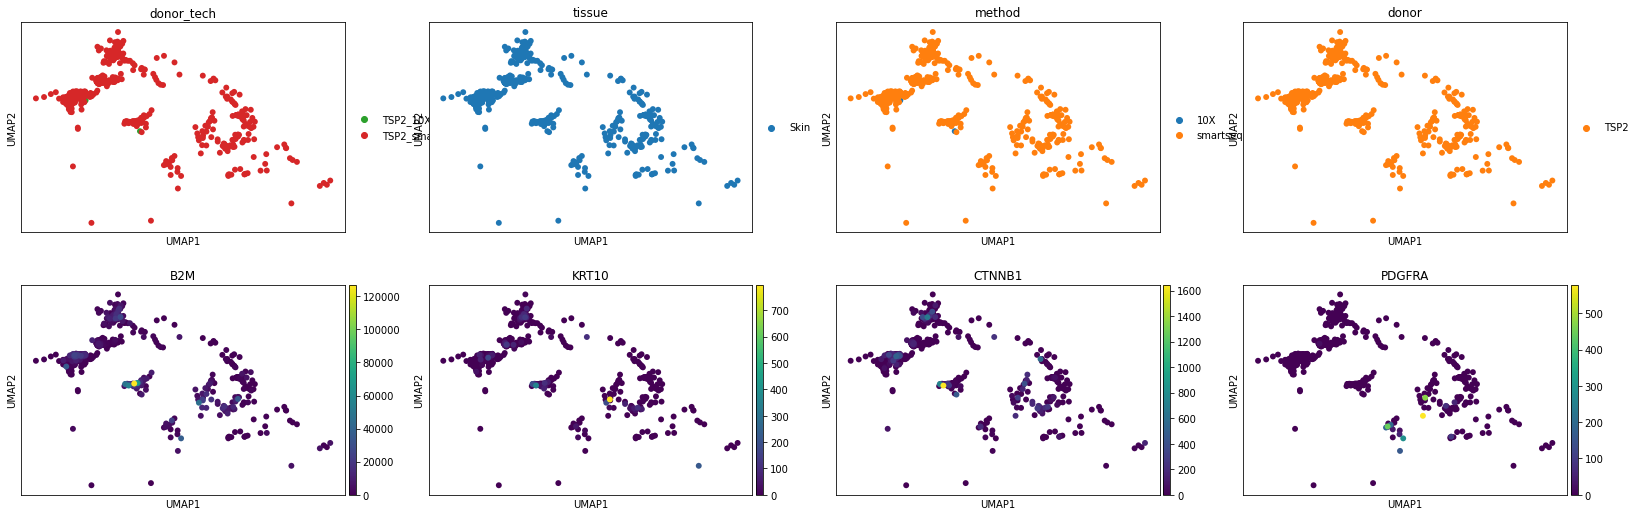

In [45]:
sc.pl.umap(
    combined2[combined2.obs['tissue'].isin(['Skin'])],
    color=['donor_tech','tissue','method','donor','B2M','KRT10','CTNNB1','PDGFRA'])

In [100]:
combined.write_h5ad(data_path + 'Pilot1_Pilot2_filtered_ensembl_id.june30.ss2_norm.embedding_donor_tech.h5ad')

In [109]:
combined = read_h5ad(data_path + 'combined/Pilot1_Pilot2_filtered_ensembl_id.june26.ss2_norm.embedding_donor_tech_tissue.h5ad')

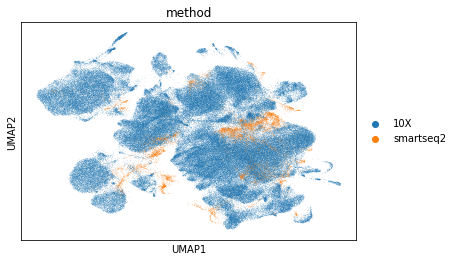

In [110]:
sc.pl.umap(combined, color=['method'])

In [47]:
combined.obs.columns

Index(['10X_run', 'smartseq2_barcode', 'smartseq2_library_plate',
       'smartseq2_sorting_direction', 'smartseq2_sort_order',
       'smartseq2_cDNA_Plate', 'cell_id', 'method', 'notes', 'donor',
       'smartseq2_sorted_population', '10X_replicate', '10X_sample',
       'sequencer', 'sex', 'anatomical_position', 'tissue',
       'smartseq2_well_seq', '10X_barcode', 'n_counts', 'n_genes', 'batch',
       'donor_tech_tissue', 'donor_tech'],
      dtype='object')

In [49]:
def remove_cats(adata):

    cat_columns = adata.obs.select_dtypes(['category']).columns
    adata.obs[cat_columns] = adata.obs[cat_columns].astype(str)
    
    return adata

In [53]:
combined

AnnData object with n_obs × n_vars = 204082 × 58870 
    obs: '10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'notes', 'donor', 'smartseq2_sorted_population', '10X_replicate', '10X_sample', 'sequencer', 'sex', 'anatomical_position', 'tissue', 'smartseq2_well_seq', '10X_barcode', 'n_counts', 'n_genes', 'batch', 'donor_tech_tissue', 'donor_tech'
    var: 'feature_types-0-0', 'n_cells-0-0', 'gene_symbol-0-0', 'n_cells-1-0', 'n_cells-0', 'feature_types-0-0-1', 'gene_symbol-0-0-1', 'n_cells-1-0-1', 'n_cells-1-1', 'n_cells'
    uns: 'donor_colors', 'method_colors', 'neighbors', 'umap', 'donor_tech_colors'
    obsm: 'UMAP_donor_tech.100', 'UMAP_donor_tech.200', 'UMAP_donor_tech.50', 'X_scvi', 'X_scvi_donor_tech', 'X_umap'

In [52]:
combined.obs.groupby(['tissue'])['cell_id'].count()

tissue
Bladder            25751
Blood              16017
Bone_Marrow         3185
Fat                  301
Heart                268
Kidney             24237
Large_Intestine     8193
Lung               37162
Lymph_Node         10064
Muscle             21731
Pancreas            8893
Skin                 858
Small_Intestine     9546
Spleen              8366
Thymus             12894
Trachea             8033
Vasculature         8583
Name: cell_id, dtype: int64

In [51]:
combined = remove_cats(combined)
combined.obs.groupby(['tissue','anatomical_position','method'])['cell_id'].count()

tissue           anatomical_position  method   
Bladder          nan                  10X          24749
                                      smartseq2     1002
Blood            nan                  10X          15174
                                      smartseq2      843
Bone_Marrow      nan                  smartseq2      325
                 vertebralbody        10X           2860
Fat              MAT                  10X            115
                 SCAT                 10X            186
Heart            ventricle            10X            268
Kidney           nan                  10X          23851
                                      smartseq2      386
Large_Intestine  distal               10X           3983
                 nan                  smartseq2      388
                 proximal             10X           3822
Lung             MedialDistal         smartseq2      332
                 Neuron               smartseq2      298
                 Proximal             sm

# batch by tech

[2020-06-28 07:11:38,482] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2020-06-28 07:11:38,494] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2020-06-28 07:12:01,081] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2020-06-28 07:12:09,299] INFO - scvi.dataset.dataset | Downsampled from 204804 to 204804 cells


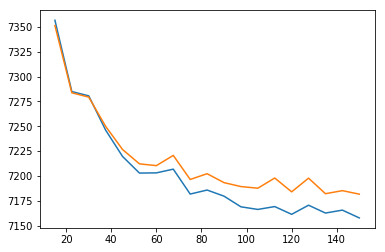

In [101]:
train_data = scVIdata_preprocess(combined, batch_col='method', label_col='tissue')

posterior = get_scvi_posterior(train_data, 
                               model_path+'Pilot12.all.tech.50.3.ss2_norm.scVI.pkl', 
                               retrain=retrain, n_latent=50, n_layers=3,
                               n_epochs=100)


In [102]:
latent = posterior.get_latent()
combined.obsm['X_scvi'] = latent[0]
sc.pp.neighbors(combined, n_neighbors=100, n_pcs=30, use_rep="X_scvi")
sc.tl.umap(combined)
combined.obsm['UMAP_tech.100'] = combined.obsm['X_umap']
combined.obsm['X_scvi_tech'] = combined.obsm['X_scvi']

In [103]:
sc.pp.neighbors(combined, n_neighbors=200, n_pcs=30, use_rep="X_scvi")
sc.tl.umap(combined)
combined.obsm['UMAP_tech.200'] = combined.obsm['X_umap']

In [104]:
sc.pp.neighbors(combined, n_neighbors=50, n_pcs=30, use_rep="X_scvi")
sc.tl.umap(combined)
combined.obsm['UMAP_tech.50'] = combined.obsm['X_umap']

In [105]:
np.unique(combined.obs['method'],return_counts=True)

(array(['10X', 'smartseq2'], dtype=object), array([191716,  13088]))

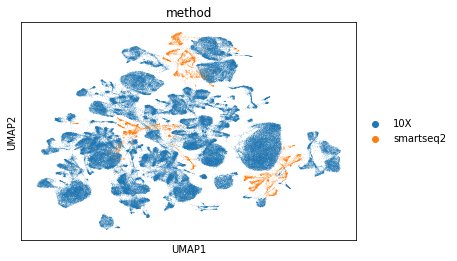

In [107]:
sc.pl.umap(combined, color=['method'])

In [ ]:
combined.write_h5ad(data_path + 'combined/Pilot1_Pilot2_filtered_ensembl_id.june26.ss2_norm.embedding_tech.h5ad')